# Exploring Dandiset 001349: GABAergic Inputs Shape Neuronal Subnetworks in Somatosensory Cortex

> **Note**: This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset 001349: "From Initial Formation to Developmental Refinement: GABAergic Inputs Shape Neuronal Subnetworks in the Primary Somatosensory Cortex". The dataset contains two-photon calcium imaging data acquired in the primary somatosensory cortex of developing mice (postnatal days P11–P21), alongside synchronized behavioral video recordings.

**Dandiset URL**: [https://dandiarchive.org/dandiset/001349/0.250520.1729](https://dandiarchive.org/dandiset/001349/0.250520.1729)

This dataset is valuable for understanding how neural circuits develop and refine during early postnatal development. It contains data recorded using two-photon calcium imaging, with behavioral synchronization via LED triggers.

## What This Notebook Covers

This notebook will guide you through:

1. Accessing basic metadata about the Dandiset
2. Exploring the structure and organization of NWB files within the dataset
3. Loading and examining a representative NWB file
4. Accessing and visualizing cell segmentation information
5. Extracting and plotting calcium imaging traces (ΔF/F and calcium events)
6. Understanding behavioral synchronization information
7. Recommendations for further exploration and analysis

## Required Packages

The following packages are required to run this notebook:

In [1]:
# Import required packages
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import islice

## Exploring Dandiset Metadata

First, let's use the DANDI API to access basic information about the Dandiset:

In [2]:
# Connect to DANDI API and get Dandiset information
client = DandiAPIClient()
dandiset_id = "001349"
dandiset_version = "0.250520.1729"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata.get('description', 'N/A')}")
print(f"License: {metadata.get('license', 'N/A')}")

# Check if numberOfSubjects is an integer or list before using len()
number_of_subjects = metadata.get('assetsSummary', {}).get('numberOfSubjects', "N/A")
if isinstance(number_of_subjects, list):
    print(f"Number of subjects: {len(number_of_subjects)}")
else:
    print(f"Number of subjects: {number_of_subjects}")

print(f"Total size: {metadata.get('assetsSummary', {}).get('totalSize', 'N/A')} bytes")

Dandiset name: From Initial Formation to Developmental Refinement: GABAergic Inputs Shape Neuronal Subnetworks in the Primary Somatosensory Cortex
Dandiset URL: https://dandiarchive.org/dandiset/001349/0.250520.1729
Description: The calcium imaging data were obtained through two-photon awake imaging of the somatosensory cortex in developing mice from P11 to P21. Simultaneously, behavioral video recordings were collected from the experimental setup. The two modalities were synchronized using an LED signal at the start and end of the two-photon imaging experiment. Imaging data analysis was performed using Python or MATLAB, utilizing standard toolboxes, open-access toolboxes, and custom-written code.
License: ['spdx:CC-BY-4.0']
Number of subjects: 32
Total size: N/A bytes


## Exploring NWB Files in the Dandiset

Now, let's list some of the NWB files in this Dandiset to understand its structure:

In [3]:
# List NWB files (showing first 20)
assets = dandiset.get_assets_by_glob("*.nwb")
asset_list = list(islice(assets, 20))

# Prepare a summary table
result = []
for asset in asset_list:
    result.append({
        "path": asset.path,
        "size_MB": round(asset.size / 1e6, 2)
    })

# Display summary
summary_table = pd.DataFrame(result)
summary_table

,path,size_MB
0,sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb,26.63
1,sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-1_ophys.nwb,28.30
2,sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-2_ophys.nwb,33.31
3,sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-3_ophys.nwb,38.86
4,sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-0_ophys.nwb,36.63
5,sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-4_ophys.nwb,44.80
6,sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-1_ophys.nwb,35.53
7,sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-11_ophys.nwb,30.92
8,sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-12_ophys.nwb,39.53
9,sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-13_ophys.nwb,29.57


We can see that the files are organized by subject (e.g., `sub-C57-C2-2-AL`) and session (e.g., `ses-1`, `ses-2`). Each path represents a two-photon calcium imaging recording session, with typical file sizes around 20-45 MB.

## Loading a Representative NWB File

Let's load a representative NWB file to explore its structure and contents:

In [4]:
# Define the file to load
asset_path = "sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb"

# Stream the remote file (no need to download)
url = next(dandiset.get_assets_by_glob(asset_path)).download_url
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

## Exploring Session and Subject Metadata

Let's extract the key metadata from this NWB file to understand the experiment:

In [5]:
# Extract metadata from the NWB file
info = {
    'Session description': nwb.session_description,
    'Session start time': str(nwb.session_start_time),
    'Experimenter': nwb.experimenter,
    'Institution': getattr(nwb, 'institution', ''),
    'Data collection': getattr(nwb, 'data_collection', ''),
    'Subject ID': nwb.subject.subject_id,
    'Species': getattr(nwb.subject, 'species', ''),
    'Sex': getattr(nwb.subject, 'sex', ''),
    'Age': getattr(nwb.subject, 'age', ''),
    'Date of birth': str(getattr(nwb.subject, 'date_of_birth', '')),
    'Imaging rate': nwb.imaging_planes['ImagingPlane_1_chn1'].imaging_rate,
    'Imaging plane location': nwb.imaging_planes['ImagingPlane_1_chn1'].location,
    'Device': nwb.imaging_planes['ImagingPlane_1_chn1'].device.description,
}

# Display metadata as table
mdf = pd.DataFrame(list(info.items()), columns=['Field', 'Value'])
mdf

,Field,Value
0,Session description,CNOInjection: +; P15CNO: Neg
1,Session start time,2021-10-29 00:00:00-05:00
2,Experimenter,"(Edna,)"
3,Institution,Indiana University Bloomington
4,Data collection,Two-photon calcium imaging
5,Subject ID,C57-C2-2-AL
6,Species,Mus musculus
7,Sex,F
8,Age,P11D
9,Date of birth,2021-10-18 00:00:00-05:00


The metadata provides us with important experimental context:
- This is recording from a young mouse (P11D) in the right hemisphere, layer 2.
- The imaging was performed at ~15.23 Hz (frames per second).
- The session was conducted using a two-photon microscope.
- The experimental condition involves CNO injection (CNOInjection: +; P15CNO: Neg).

## Understanding the NWB File Structure

The NWB file contains segmented ROIs (regions of interest, typically corresponding to individual neurons) and various processed signals. The ROI segmentation information is stored in the `ophys` processing module as a `PlaneSegmentation` object.

In [6]:
# Access the processing module for ophys
o_phys = nwb.processing['ophys']

# Get the number of ROIs from the ImageSegmentation data interface
seg = o_phys.data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation_1']
num_rois = seg.id.data.shape[0]

print(f"Number of ROIs (cells): {num_rois}")

Number of ROIs (cells): 143


### ROI Segmentation (PlaneSegmentation) Structure

The ROI segmentation contains:
- 143 segmented ROIs (cells) with pixel-level masks
- These masks are stored in the PlaneSegmentation structure
- Each ROI's mask is in the "pixel_mask" DynamicTable column

**Note**: Due to specific format choices in this dataset, extracting and visualizing individual ROI masks can be complex. The Neurosift NWB browser provides an interactive way to explore these masks: [Neurosift Browser Link](https://neurosift.app/nwb?dandisetId=001349&dandisetVersion=0.250520.1729&path=sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb)

## Exploring Available Signals

The NWB file contains several types of processed calcium imaging signals. Let's list the available signal types:

In [7]:
# List available signal types (RoiResponseSeries)
roi_resp = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series
for key, value in roi_resp.items():
    print(f"{key}: {value.description}, shape: {value.data.shape}, unit: {value.unit}")

ca_events_chn0: Ca_Events, shape: (4572, 143), unit: a.u.
dff_chn0: Dff, shape: (4572, 143), unit: a.u.
f_corrected_chn0: F_Corrected, shape: (4572, 143), unit: a.u.
fluorescence_chn0: Fluorescence, shape: (4572, 143), unit: a.u.
neuropil_fluorescence_chn0: Neuropil_Fluorescence, shape: (4572, 143), unit: a.u.
z_score_chn0: Z_Score, shape: (4572, 143), unit: a.u.


The available signals in this dataset are:

| Signal name | Description | Analytical use |
|-------------|-------------|----------------|
| dff_chn0 | ΔF/F (delta F over F) | Standard for quantifying relative activity changes |
| ca_events_chn0 | Calcium event times/traces | Discrete event detections for event statistics |
| f_corrected_chn0 | Corrected fluorescence | Clean fluorescence with background correction |
| fluorescence_chn0 | Raw fluorescence | Original signal for custom preprocessing |
| neuropil_fluorescence_chn0 | Background fluorescence | Signal from non-cellular surroundings |
| z_score_chn0 | Z-scored fluorescence | Standardized activity across cells |

Each signal has the same shape: (time points, ROIs)

## Visualizing Calcium Imaging Data

### 1. ΔF/F Traces

Let's extract and visualize ΔF/F traces for the first 10 cells over the first 1000 time points:

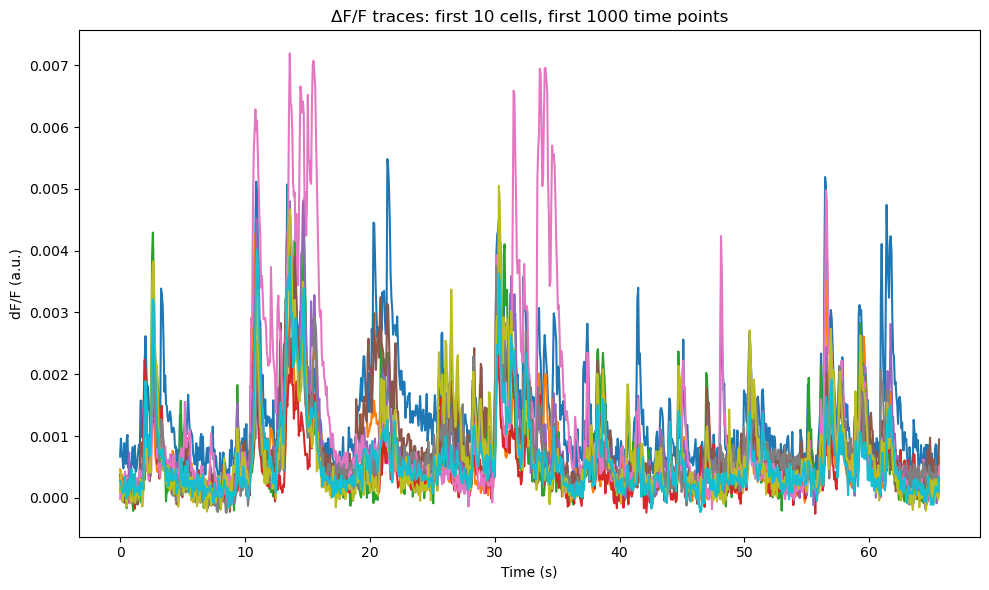

In [8]:
# Get dF/F traces
dff = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['dff_chn0']
dff_data = dff.data[:1000, :10]  # first 1000 time points, first 10 cells
rate = dff.rate

# Plot
plt.figure(figsize=(10, 6))
t = np.arange(dff_data.shape[0]) / rate
for i in range(dff_data.shape[1]):
    plt.plot(t, dff_data[:, i], label=f'Cell {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('dF/F (a.u.)')
plt.title('ΔF/F traces: first 10 cells, first 1000 time points')
plt.tight_layout()
plt.show()

The plot shows the ΔF/F (delta F over F) fluorescence traces for 10 cells over approximately 65 seconds. These traces represent relative changes in fluorescence, where transient increases typically correspond to neural activity.

### 2. Calcium Event Traces

Now let's look at the calcium event traces, which represent deconvolved, event-like signals:

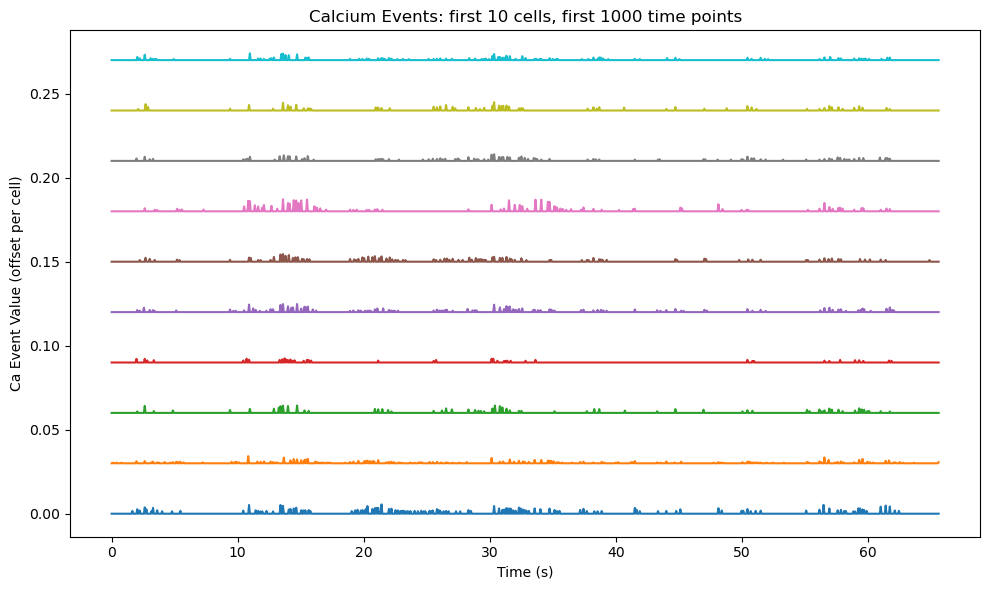

In [9]:
# Get CA event traces
caev = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['ca_events_chn0']
caev_data = caev.data[:1000, :10]  # first 1000 time points, first 10 cells
rate = caev.rate

# Plot with small offset for better visualization
plt.figure(figsize=(10, 6))
t = np.arange(caev_data.shape[0]) / rate
for i in range(caev_data.shape[1]):
    plt.plot(t, caev_data[:, i] + i*0.03, label=f'Cell {i+1}')  # small offset for separation
plt.xlabel('Time (s)')
plt.ylabel('Ca Event Value (offset per cell)')
plt.title('Calcium Events: first 10 cells, first 1000 time points')
plt.tight_layout()
plt.show()

The calcium event traces show more discrete, event-like signals, which are typically derived from deconvolution methods. These sparse signals represent detected calcium events and are useful for:
- Estimating event rates or burst timing 
- Synchronizing activity to behavioral events
- Population decoding or ensemble analysis

## Accessing Behavioral Synchronization and Event Data

The Dandiset mentions that behavioral video was synchronized to the two-photon imaging via LED triggers. In NWB, these synchronization signals are commonly stored in the `acquisition` or `processing` groups as TimeSeries objects.

In [10]:
# List available acquisition TimeSeries (may include behavior sync signals)
print("Acquisition TimeSeries:")
for key in nwb.acquisition:
    print(f"  - {key}")

Acquisition TimeSeries:


To access synchronization signals like LED triggers, you would typically look for TimeSeries with names containing "LED", "trigger", or "sync". If available, you can access the data as follows:

In [11]:
# Example code to access a trigger signal (if available)
# If 'LED_trigger' or similar isn't available, this cell might not run
try:
    # Replace 'LED_trigger' with the actual name from your dataset
    if 'LED_trigger' in nwb.acquisition:
        led_ts = nwb.acquisition['LED_trigger']
        print(f"LED trigger info: {led_ts.description}, {led_ts.unit}")
        # To get actual data: led_data = led_ts.data[:]
    else:
        print("Note: No 'LED_trigger' found in acquisition. Check processing groups or use a different key.")
except:
    print("Note: Synchronization signals may be in processing modules or named differently.")
    print("Use nwb.acquisition keys to identify the correct TimeSeries.")

Note: No 'LED_trigger' found in acquisition. Check processing groups or use a different key.


## Summary and Recommendations

### Key Takeaways

- This Dandiset contains two-photon calcium imaging data from developing mouse somatosensory cortex (P11-P21)
- Data is organized in NWB files by subject and session
- Each file contains:
  - Metadata about the session and subject
  - ROI segmentation (cell masks)
  - Multiple types of processed signals (ΔF/F, calcium events, raw/corrected fluorescence)
  - All signals are organized as time × cell arrays
  - Behavioral synchronization via LED triggers (where available)

### Working with this Data

- Use the code in this notebook to access and visualize:
  - Different signal types (dF/F, events, raw fluorescence)
  - All cells or subsets of cells
  - Different time windows
- Combine with metadata to analyze:
  - Developmental changes with age
  - Effects of experimental manipulations
  - Population dynamics

### Future Directions

- Correlate neural activity with behavioral events
- Compare activity patterns across development
- Identify cell assemblies, synchrony, or motifs
- Analyze population dynamics and network structure